In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

def analyze_drawing(json_file, category):
    data = []
    with open(json_file, "r") as file:
        for line in file:
            data.append(json.loads(line))

    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data)

    # Calculate the length of each drawing vector as a new feature
    df['num_strokes'] = df['drawing'].apply(lambda x: len(x))

    df_no_drawing = df.drop(columns=['drawing'])

    # Encode categorical variables
    cat_cols = df_no_drawing.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    for col in cat_cols:
        df_no_drawing[col] = le.fit_transform(df_no_drawing[col])


    # Compute the correlation matrix
    corr_matrix = df_no_drawing.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(category + ' Correlation Matrix')
    plt.show()


    # Plot graph of recognized vs. not recognized
    recognized_counts = df['recognized'].value_counts()
    plt.bar(recognized_counts.index.astype(str), recognized_counts.values)
    plt.title('Recognized vs. Not Recognized Drawings')
    plt.xlabel('Recognized')
    plt.ylabel('Count')
    plt.show()

    print("Total Observations: ", df.shape[0])
    print("[Recognized\tNot Recognized]: ", recognized_counts.values)

    # Subset the data to only include drawings that are recognized
    #df = df[df['recognized'] == True]

        # Display dot plot of percentage recognized as true by number of strokes
    percentage_true = df.groupby('num_strokes')['recognized'].mean() * 100
    plt.figure(figsize=(10, 6))
    plt.plot(percentage_true.index, percentage_true.values, marker='o', linestyle='-')
    plt.title(category + ' Percentage Recognized as True by Number of Strokes')
    plt.xlabel('Number of Strokes')
    plt.ylabel('Percentage Recognized as True')
    plt.grid(True)
    plt.show()

    df = df[df['recognized'] == True]
    # Plot histogram of drawing vector lengths with increased bucket size
    plt.hist(df['num_strokes'], bins=np.arange(min(df['num_strokes']), max(df['num_strokes']) + 1.5) - 0.5, color='skyblue', edgecolor='black')  # Increase bins to 50
    plt.title(category + ' Distribution of Drawing Vector Lengths')
    plt.xlabel('Length of Drawing Vector')
    plt.ylabel('Frequency')
    plt.show()

    # Count the frequencies of drawing vector lengths
    frequency_counts = df['num_strokes'].value_counts()

    # Display the frequencies
    print("Length of Drawing Vector\tFrequency")
    for length, frequency in frequency_counts.items():
        print(f"{length}\t\t\t{frequency}")


# Methodology
The provided code segment conducts exploratory data analysis (EDA) on a dataset derived from Google's Quick, Draw! project, focusing on drawings of apples. Initially, the code loads the dataset, comprising drawings stored in JSON format, into a Pandas DataFrame. To ensure the reliability of the analysis, the code subsets the data to only include drawings that are accurately recognized. By focusing solely on recognized drawings, the analysis aims to enhance the reliability and relevance of insights derived from the dataset, potentially leading to more precise conclusions regarding stroke frequency distributions and outliers. Following this, the code computes the number of strokes for each drawing by applying a lambda function to the 'drawing' column, yielding a new column named 'num_strokes'. Subsequently, the code employs the interquartile range (IQR) method to identify outliers in the distribution of stroke frequencies. It calculates the first quartile (Q1) and third quartile (Q3) of the 'num_strokes' column, defines the lower and upper bounds for outliers based on the IQR, and filters the dataset to isolate drawings with stroke frequencies falling outside this range. Additionally, the code provides statistical summaries, such as the number of outliers and total observations, and generates visualizations, including a boxplot illustrating the distribution of stroke frequencies with outliers highlighted. 

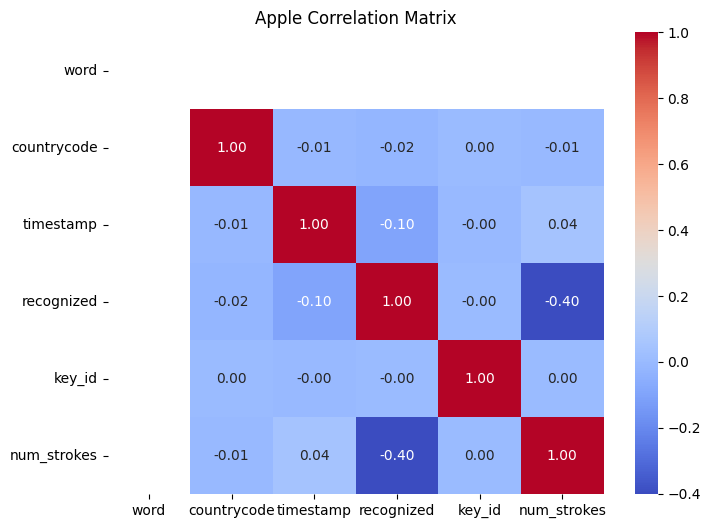

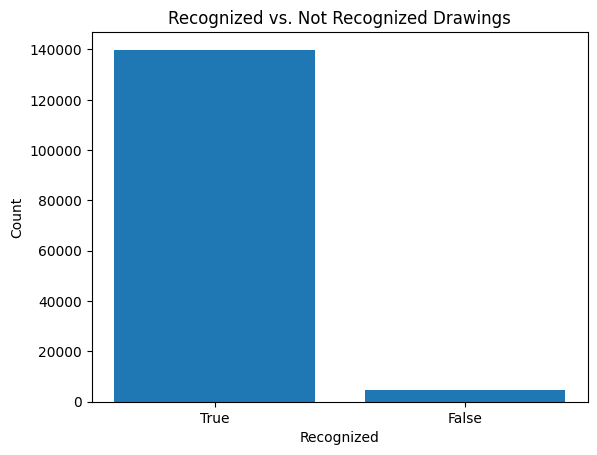

Total Observations:  144722
[Recognized	Not Recognized]:  [139902   4820]


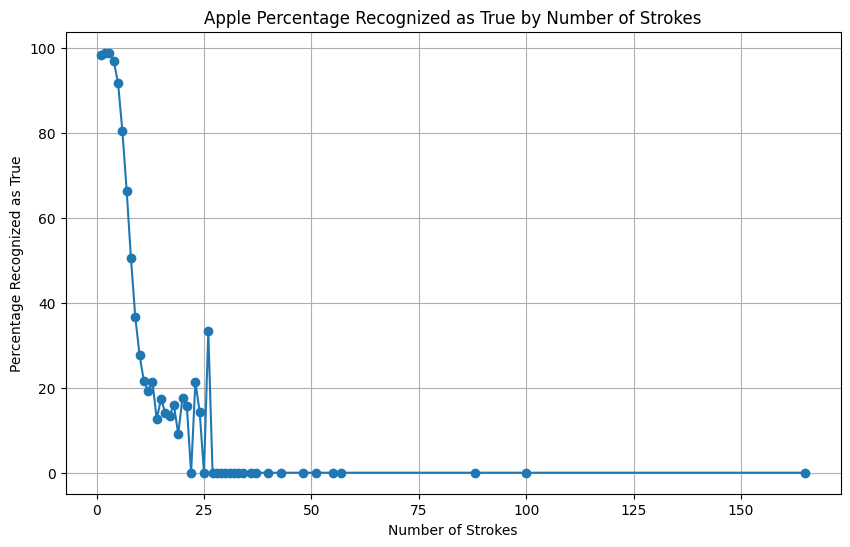

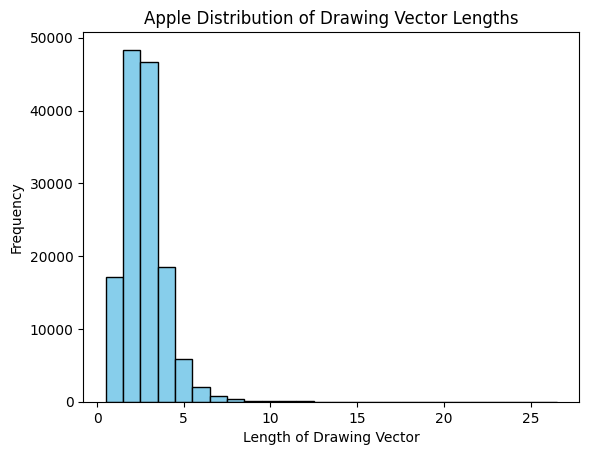

Length of Drawing Vector	Frequency
2			48355
3			46671
4			18489
1			17156
5			5825
6			1956
7			751
8			317
9			147
10			79
11			48
12			31
13			21
15			12
14			11
16			8
17			7
18			4
20			3
21			3
23			3
26			2
19			2
24			1


In [2]:
# replace "Data/apple.ndjson" with local file path
analyze_drawing("Data/apple.ndjson", "Apple")

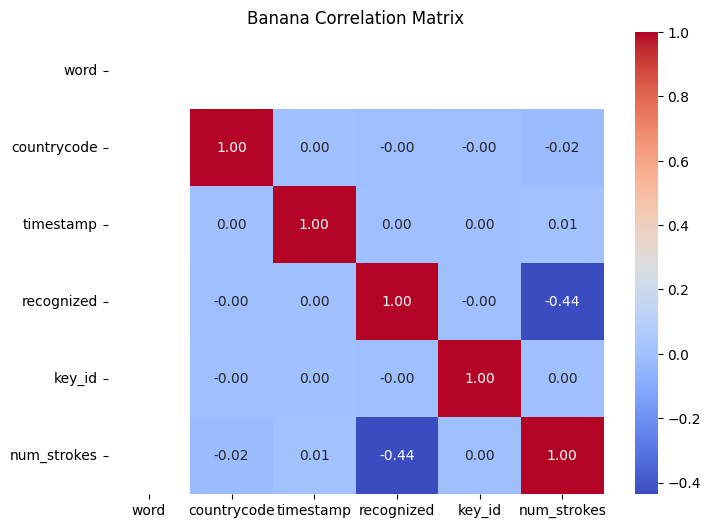

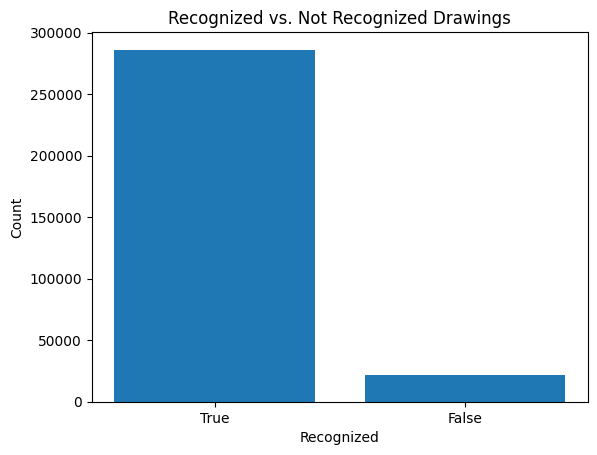

Total Observations:  307936
[Recognized	Not Recognized]:  [286030  21906]


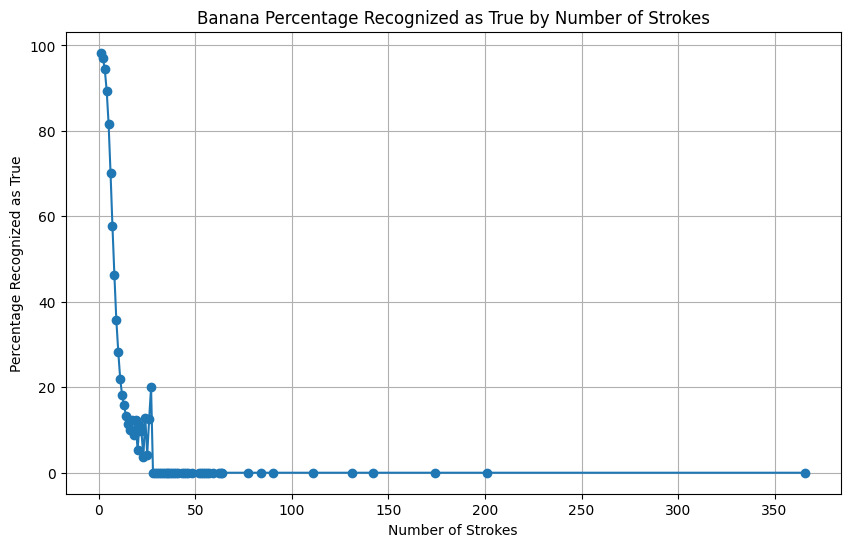

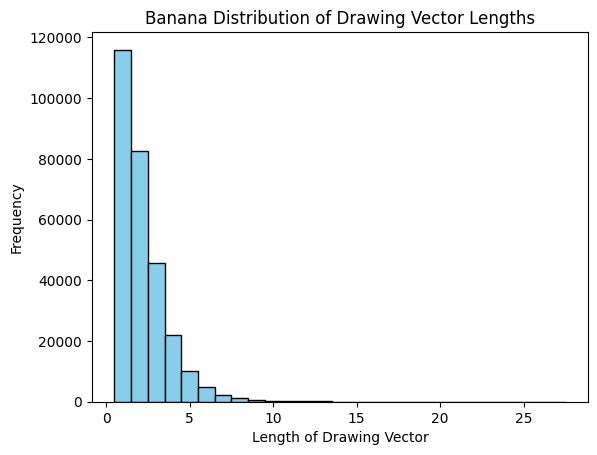

Length of Drawing Vector	Frequency
1			115951
2			82717
3			45554
4			21866
5			10185
6			4768
7			2341
8			1148
9			600
10			367
11			188
12			119
13			74
14			46
15			30
16			19
17			17
18			9
19			9
21			5
24			4
22			4
20			3
26			2
27			2
25			1
23			1


In [3]:
analyze_drawing("Data/banana.ndjson", "Banana")

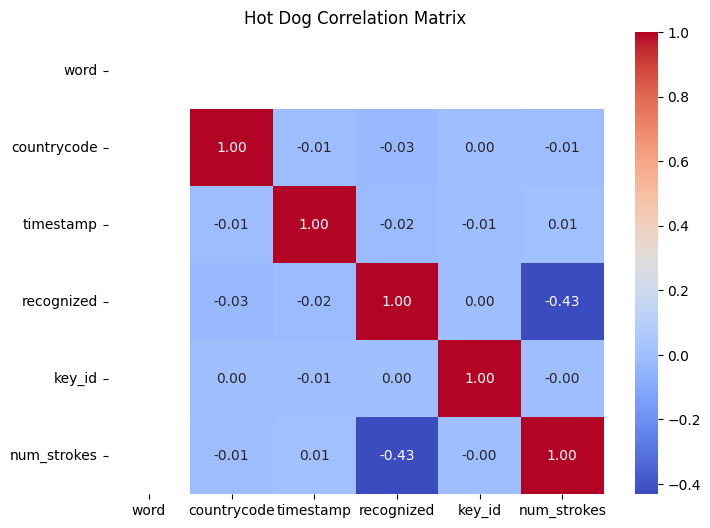

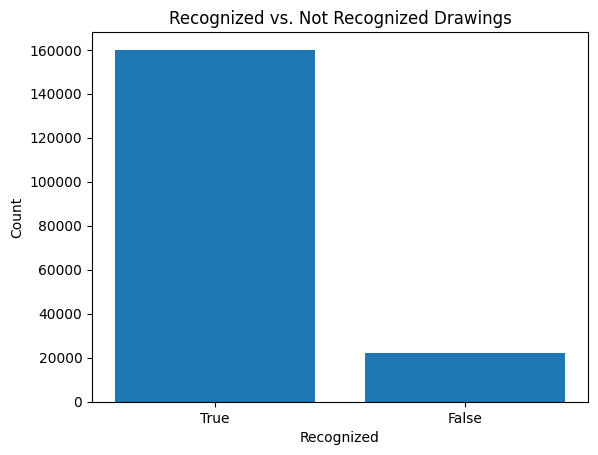

Total Observations:  181999
[Recognized	Not Recognized]:  [160034  21965]


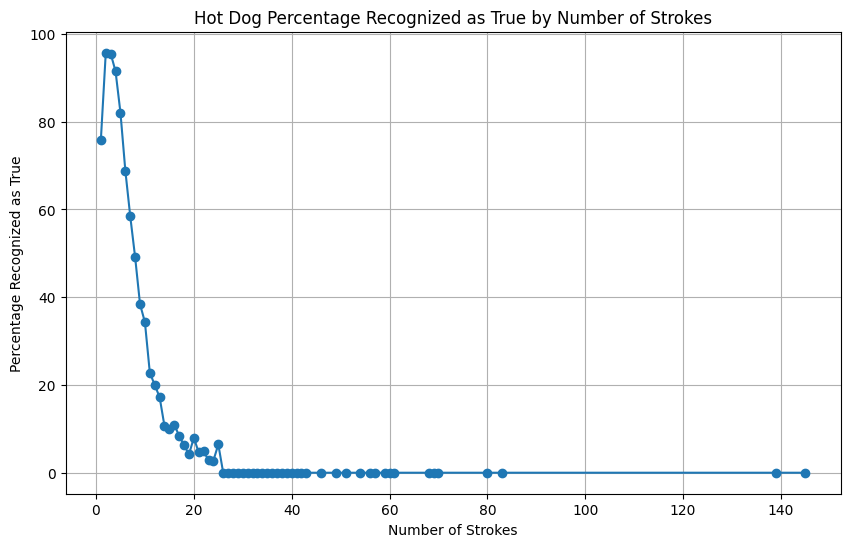

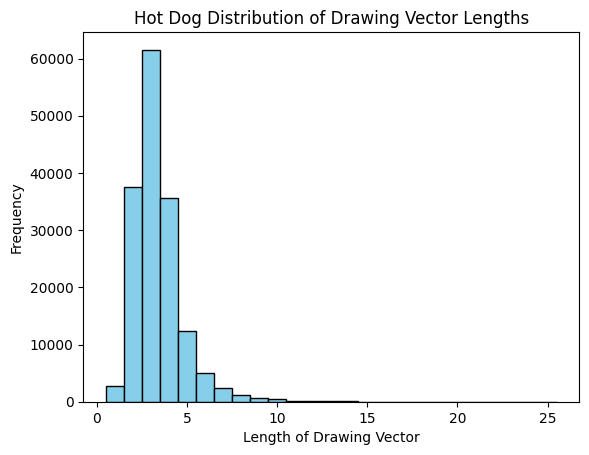

Length of Drawing Vector	Frequency
3			61544
2			37495
4			35615
5			12374
6			5021
1			2663
7			2400
8			1240
9			676
10			409
11			211
12			149
13			94
14			43
15			29
16			28
17			15
18			7
20			7
19			5
21			3
25			2
22			2
24			1
23			1


In [4]:
analyze_drawing("Data/hot dog.ndjson", "Hot Dog")

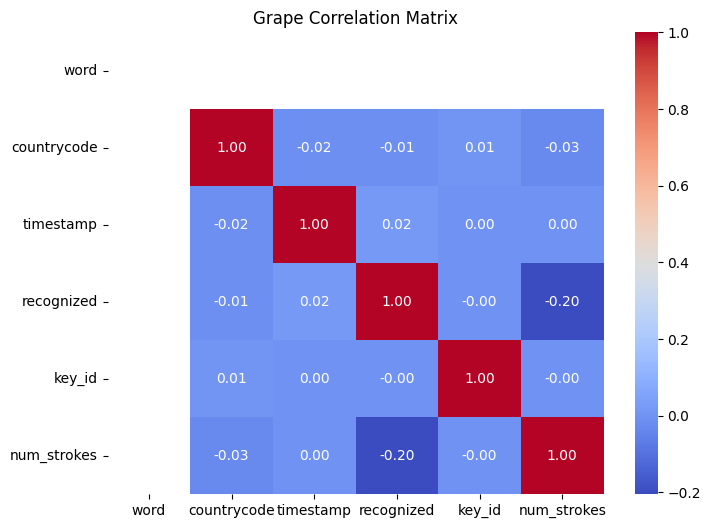

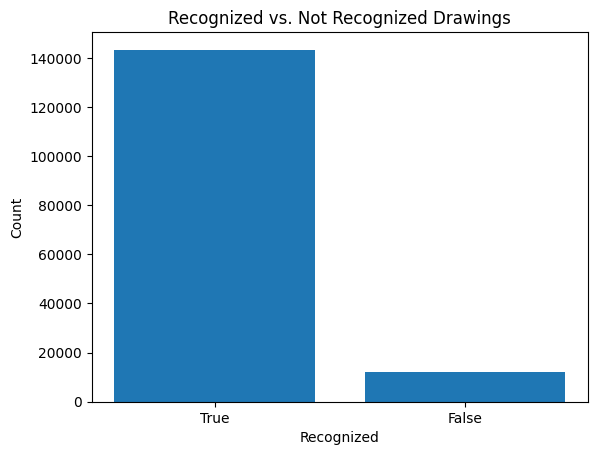

Total Observations:  155305
[Recognized	Not Recognized]:  [143320  11985]


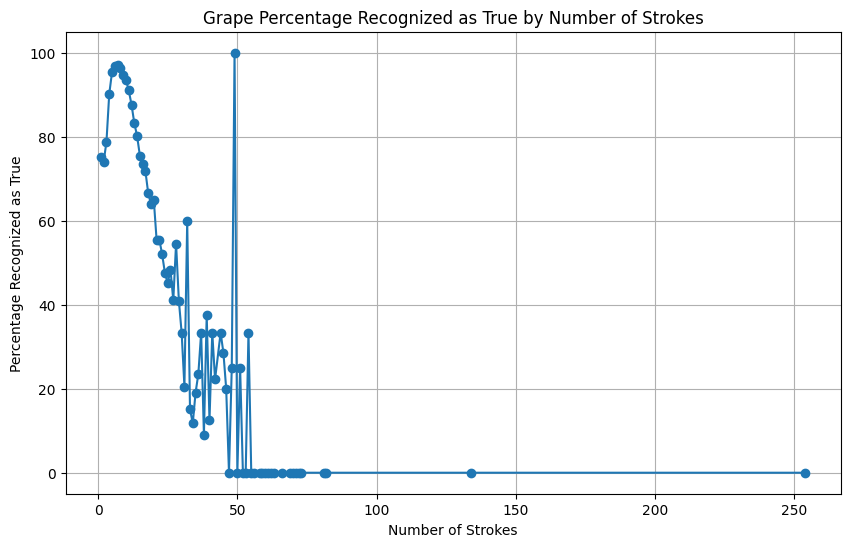

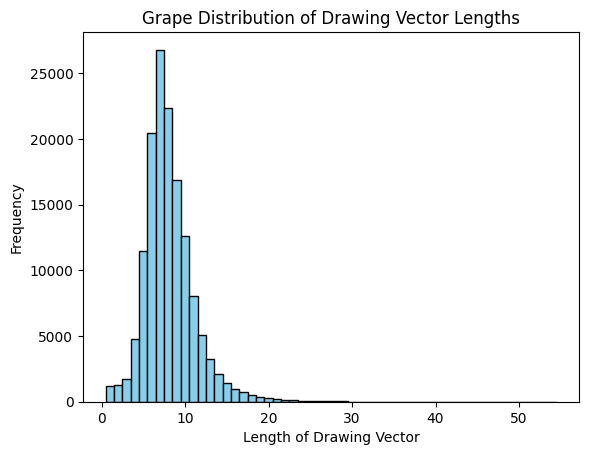

Length of Drawing Vector	Frequency
7			26795
8			22356
6			20454
9			16916
10			12624
5			11451
11			8052
12			5075
4			4803
13			3237
14			2109
3			1711
15			1438
2			1256
1			1163
16			1006
17			778
18			548
19			392
20			302
21			201
22			157
23			117
24			87
25			65
26			57
27			39
28			36
29			25
32			15
30			12
31			8
33			5
36			4
35			4
39			3
37			3
45			2
44			2
42			2
34			2
41			1
46			1
38			1
51			1
54			1
40			1
49			1
48			1


In [5]:
analyze_drawing("Data/grapes.ndjson", "Grape")

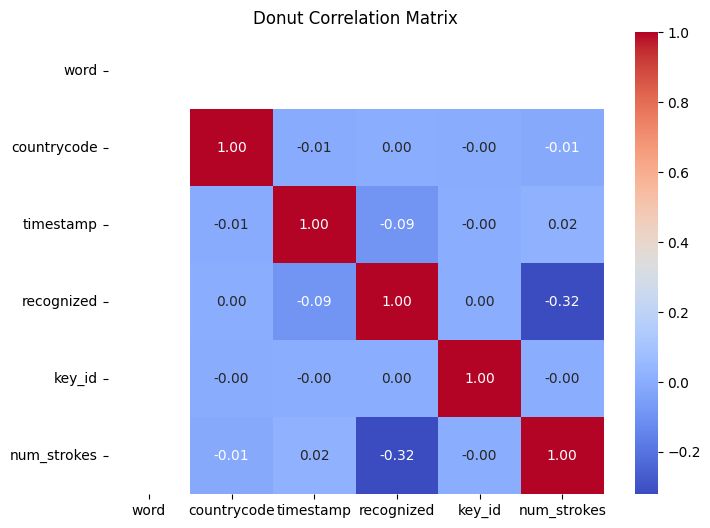

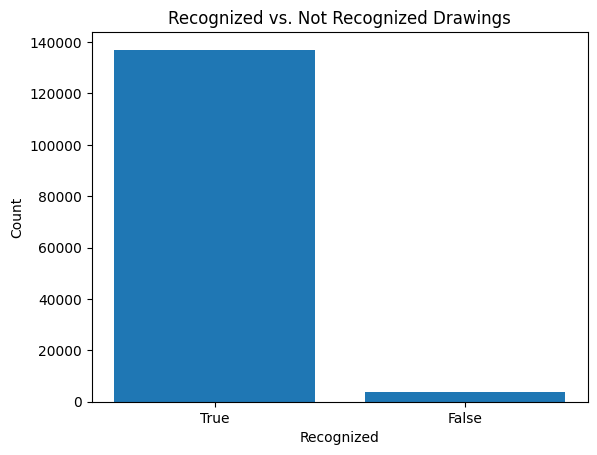

Total Observations:  140751
[Recognized	Not Recognized]:  [137038   3713]


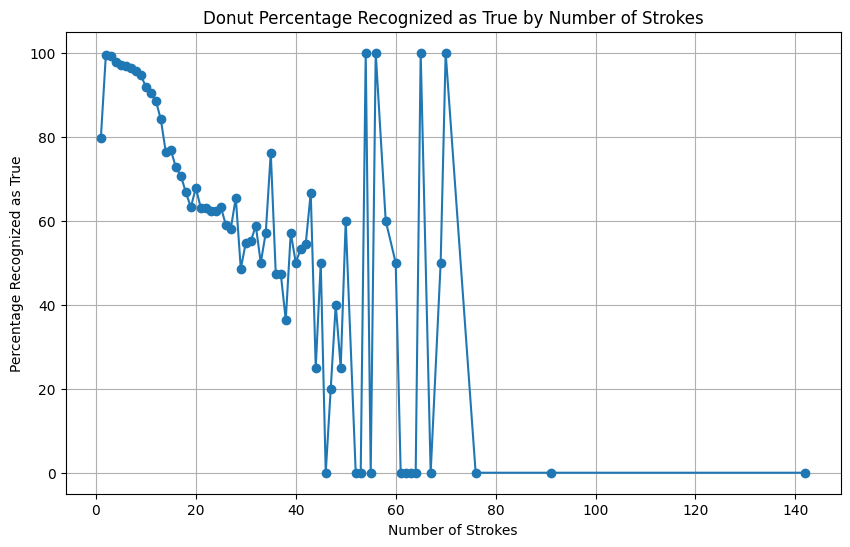

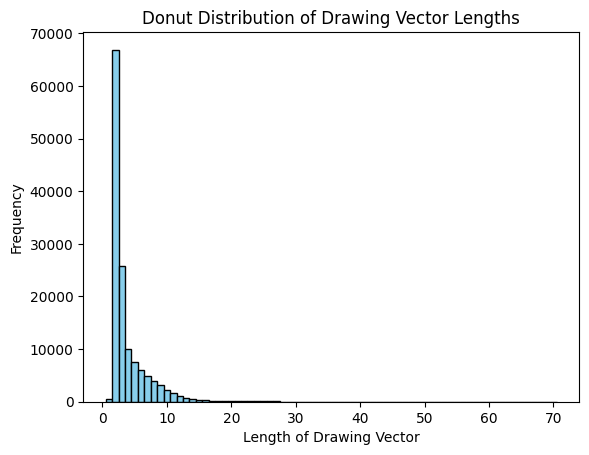

Length of Drawing Vector	Frequency
2			66870
3			25805
4			10052
5			7581
6			6084
7			4809
8			3954
9			3120
10			2315
11			1648
12			1086
13			709
1			601
14			450
15			322
16			243
17			210
18			187
19			134
20			122
21			111
23			89
22			75
24			61
25			50
26			49
27			43
28			36
31			27
30			23
34			20
32			20
29			17
33			17
35			16
36			9
37			9
40			8
41			8
39			8
38			8
42			6
43			4
58			3
50			3
45			3
56			2
44			2
48			2
49			1
65			1
47			1
69			1
70			1
54			1
60			1


In [6]:
analyze_drawing("Data/donut.ndjson", "Donut")